## **Titanic Survival Prediction**

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [98]:
df=pd.read_csv('/content/archive.zip')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### **DATA PREPROCESSING**

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [104]:
df.shape

(418, 12)

In [105]:
df.duplicated().sum()

0

In [106]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [107]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S




We have imputed missing values with mean for 'Age' and 'Fare' variables and we have droped 'Cabin' variable because of too many missing values.


In [108]:
df.drop(['Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


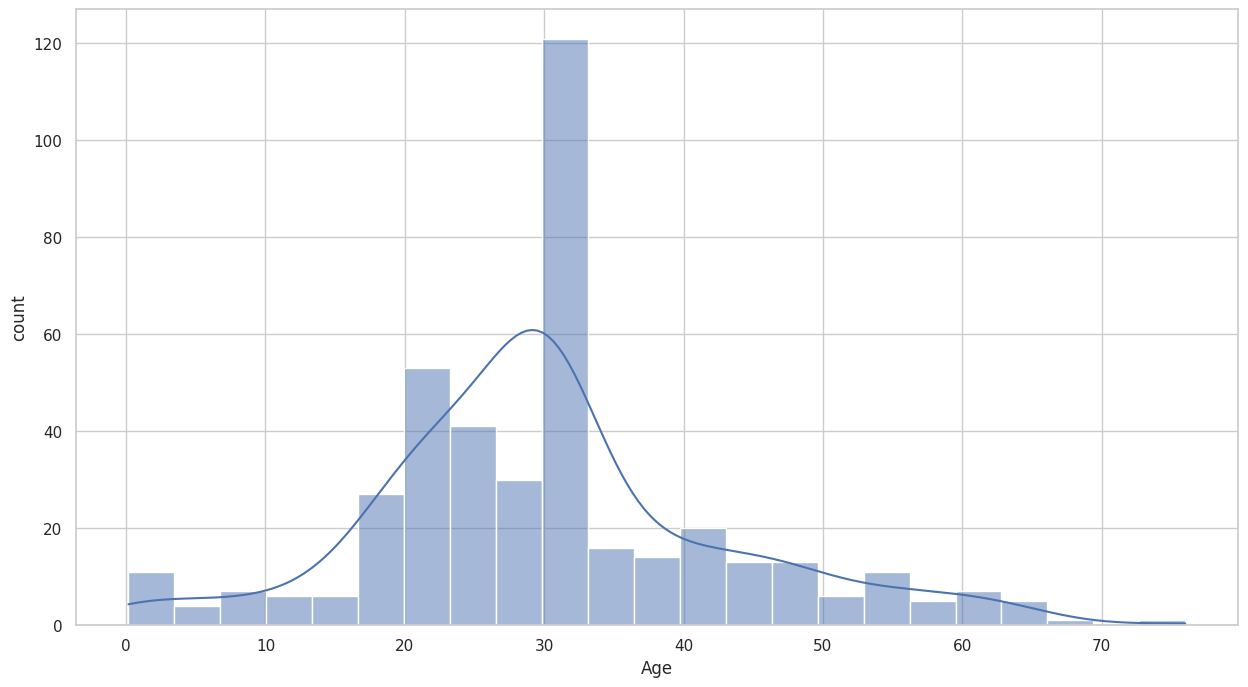

In [133]:
plt.figure(figsize=(15,8))
sns.histplot(df.Age,kde=True)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [110]:
a=df['Age'].mean()
df.Age=df.Age.fillna(a)
b=df['Fare'].mean()
df.Fare=df.Fare.fillna(b)

### **DATA VISUALIZATION**

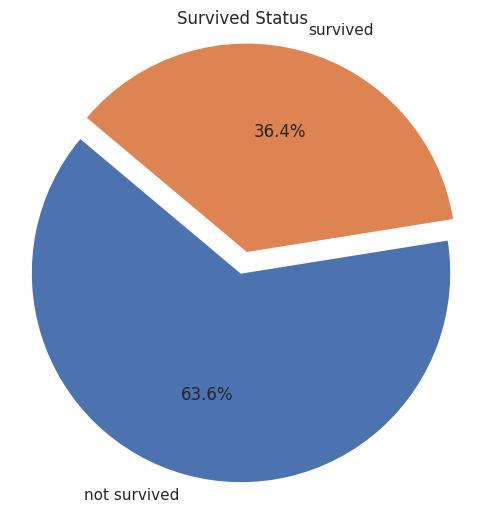

In [112]:
labels=['not survived','survived']
plt.figure(figsize=(6,6))
x=df['Survived'].value_counts()
explode = (0.1,0)
plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Survived Status")
plt.axis('equal')
plt.show()

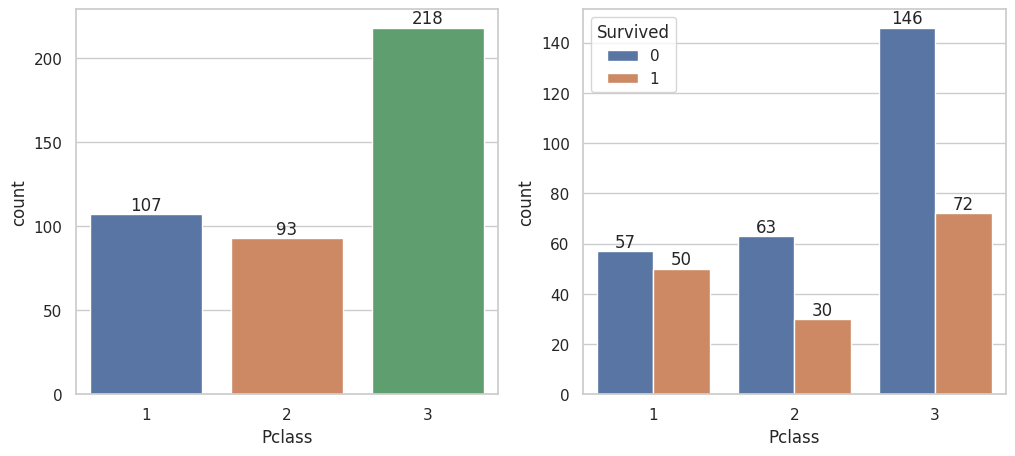

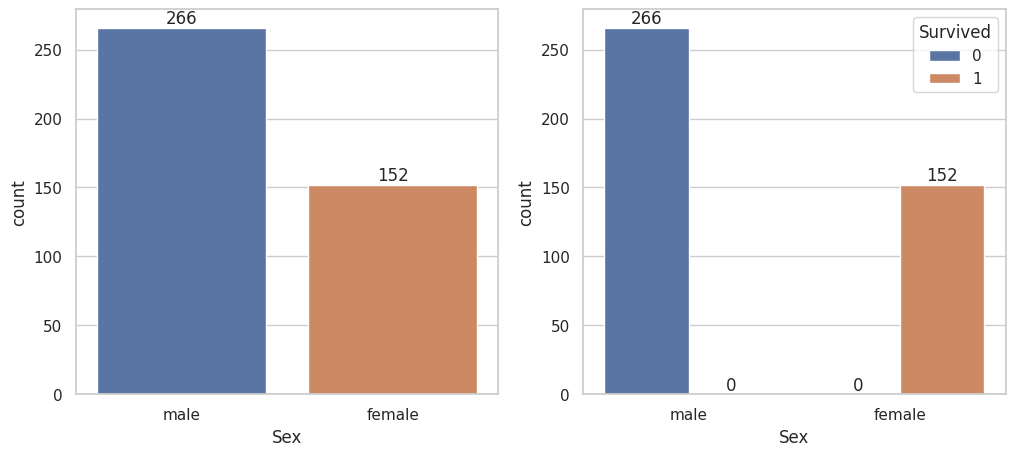

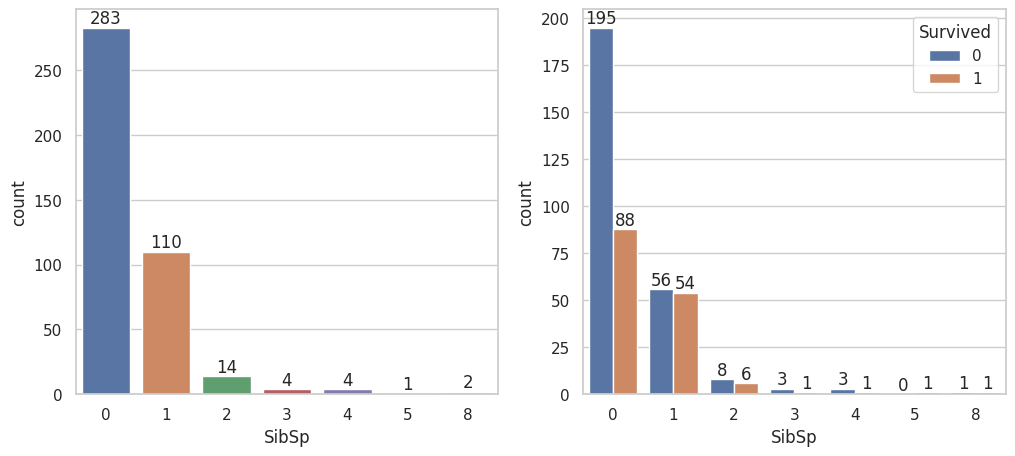

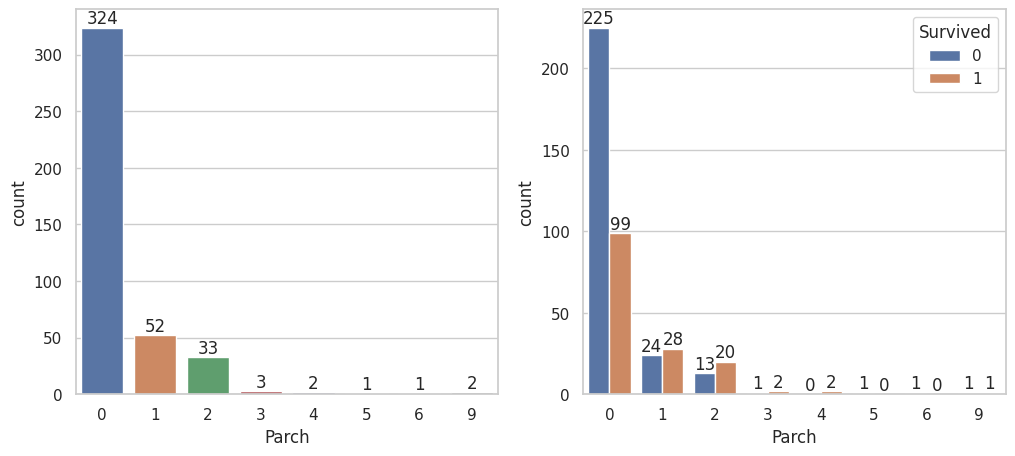

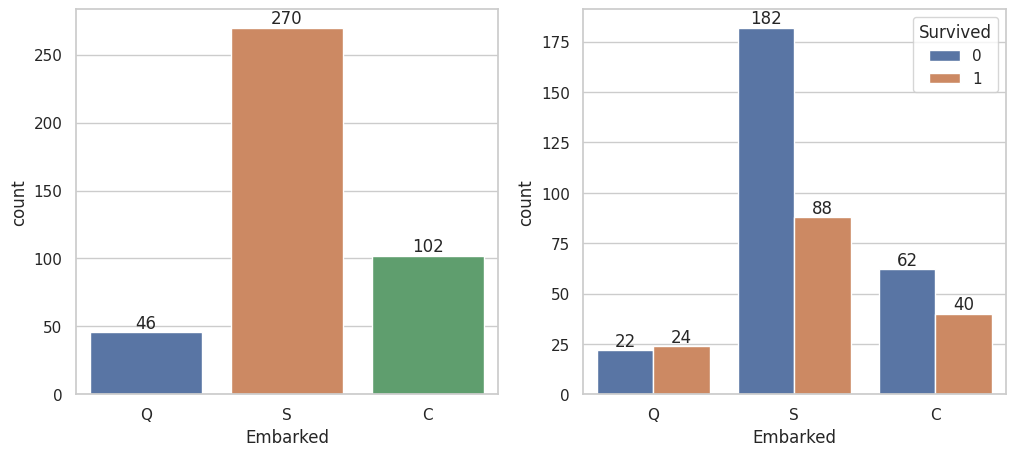

In [113]:
for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df)
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

<ipython-input-114-5c5560f47458>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


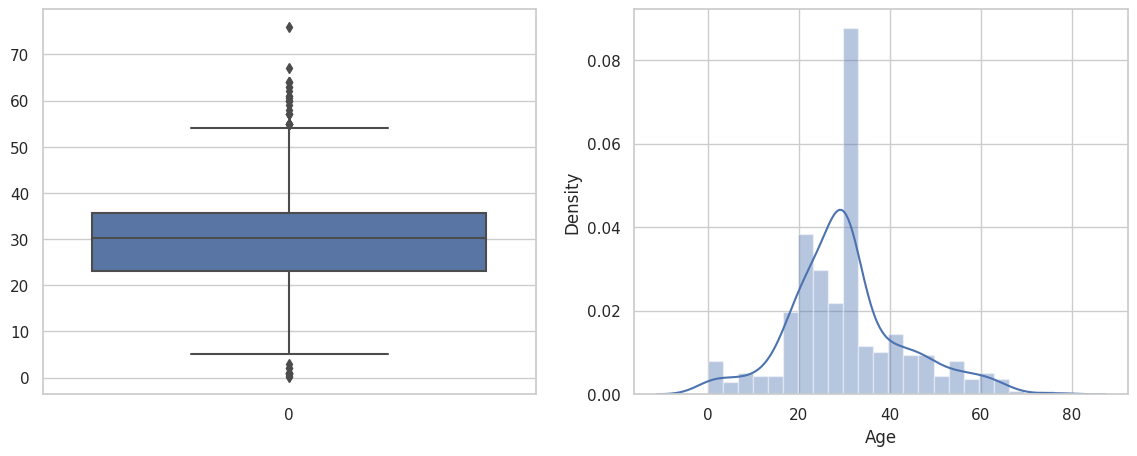

<ipython-input-114-5c5560f47458>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


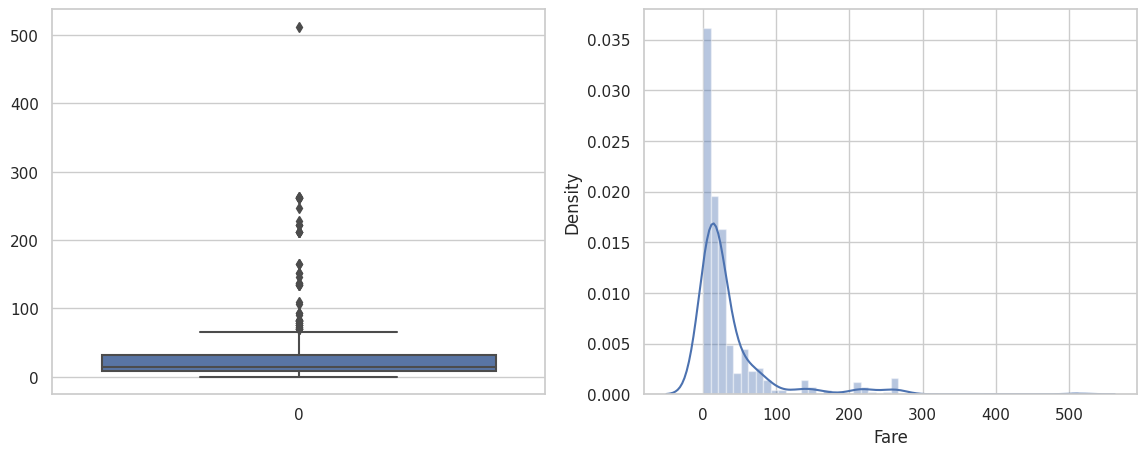

In [114]:
for column in ['Age', 'Fare']:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

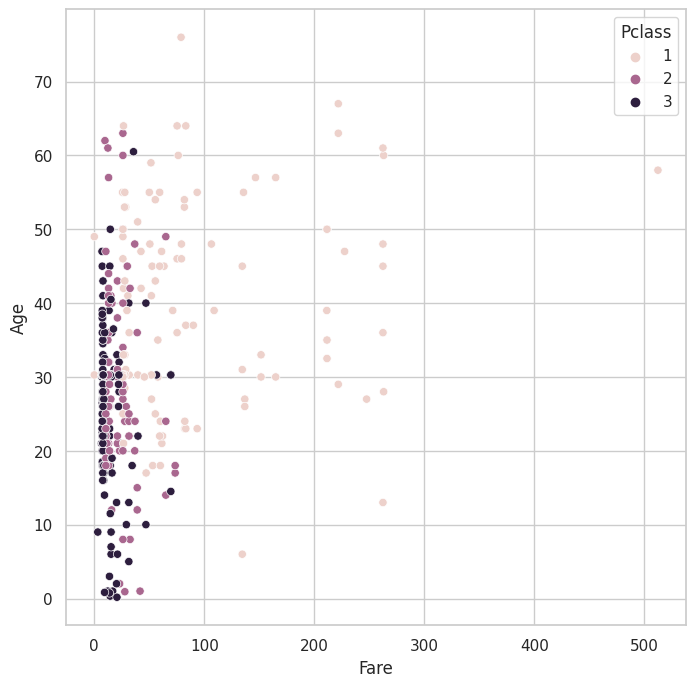

In [115]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, y='Age', x='Fare', hue='Pclass')
plt.show()

<ipython-input-116-2c5ae015d6b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=1,fmt='.0%')


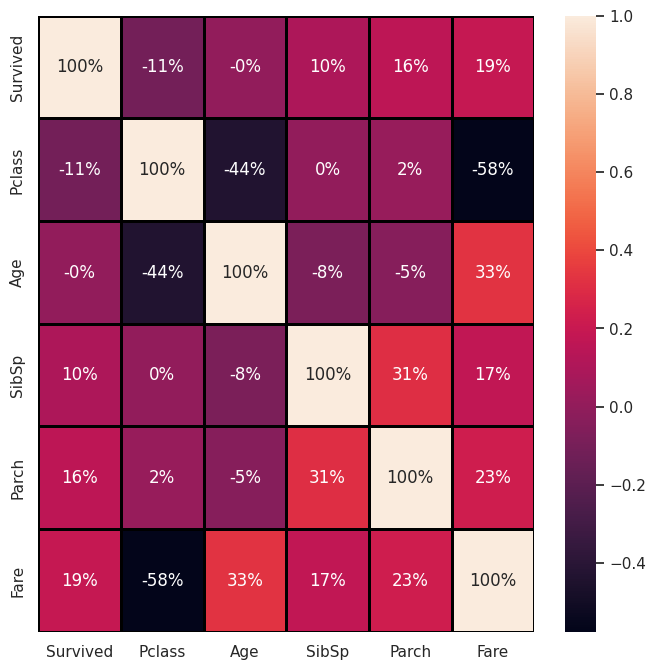

In [116]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=1,fmt='.0%')
plt.show()

### **Encoding categorical values to numerical**

In [117]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df['Embarked']=label.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


### **Spliting Independent and Dependent Features**

In [118]:
x=df.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [119]:
y=df['Survived']
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

### **MODEL SELECTION**

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [121]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,1,1,36.00000,0,0,75.2417,0
271,3,1,30.27259,0,0,7.7500,1
114,1,0,63.00000,1,0,221.7792,2
311,3,1,22.00000,0,0,7.2250,0
131,1,1,53.00000,0,0,28.5000,0
...,...,...,...,...,...,...,...
71,3,1,21.00000,0,0,7.8958,2
106,3,1,21.00000,0,0,7.8208,1
270,1,1,46.00000,0,0,75.2417,0
348,2,1,24.00000,0,0,13.5000,2


In [122]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,1,25.00000,0,0,7.2292,0
324,1,0,39.00000,0,0,211.3375,2
388,3,1,21.00000,0,0,7.7500,1
56,3,1,35.00000,0,0,7.8958,2
153,3,0,36.00000,0,2,12.1833,2
...,...,...,...,...,...,...,...
101,2,1,27.00000,1,0,26.0000,2
310,3,1,18.00000,0,0,8.6625,2
29,3,1,30.27259,2,0,21.6792,0
195,3,1,33.00000,0,0,7.8542,2


In [123]:
y_train

118    0
271    0
114    1
311    0
131    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 292, dtype: int64

In [124]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
101    0
310    0
29     0
195    0
390    0
Name: Survived, Length: 126, dtype: int64

In [125]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [126]:
x_train

array([[-1.47596812,  0.78310898,  0.38989079, ..., -0.43509701,
         0.60029624, -1.59128384],
       [ 0.8727114 ,  0.78310898, -0.04584013, ..., -0.43509701,
        -0.51006323, -0.43542593],
       [-1.47596812, -1.27696148,  2.44400174, ..., -0.43509701,
         3.01110083,  0.72043199],
       ...,
       [-1.47596812,  0.78310898,  1.15067262, ..., -0.43509701,
         0.60029624, -1.59128384],
       [-0.30162836,  0.78310898, -0.52304742, ..., -0.43509701,
        -0.41546542,  0.72043199],
       [ 0.8727114 ,  0.78310898, -0.04584013, ..., -0.43509701,
        -0.51006323, -0.43542593]])

In [127]:
x_test

array([[ 0.87630936,  0.69451634, -0.34654133, -0.49467957, -0.32809136,
        -0.51572775, -1.77481869],
       [-1.57735684, -1.43985094,  0.90508223, -0.49467957, -0.32809136,
         4.46063183,  0.65591126],
       [ 0.87630936,  0.69451634, -0.70414806, -0.49467957, -0.32809136,
        -0.50303014, -0.55945372],
       [ 0.87630936,  0.69451634,  0.5474755 , -0.49467957, -0.32809136,
        -0.49947539,  0.65591126],
       [ 0.87630936, -1.43985094,  0.63687718, -0.49467957,  1.59467662,
        -0.39494196,  0.65591126],
       [-0.35052374,  0.69451634,  1.88850074,  0.72746995, -0.32809136,
        -0.05807732,  0.65591126],
       [ 0.87630936, -1.43985094,  0.0110654 , -0.49467957, -0.32809136,
        -0.49876347,  0.65591126],
       [-1.57735684,  0.69451634,  1.79909906, -0.49467957, -0.32809136,
        -0.05807732,  0.65591126],
       [-0.35052374, -1.43985094, -0.88295142, -0.49467957, -0.32809136,
        -0.37503001,  0.65591126],
       [ 0.87630936,  0.6945

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
model_lst=[rf,dt]

RandomForestClassifier()
----------------------------------------------------------------------------------------------------
Accuracy: 1.0
Confusion Matrix:
[[85  0]
 [ 0 41]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------
Accuracy: 1.0
Confusion Matrix:
[[85  0]
 [ 0 41]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
w

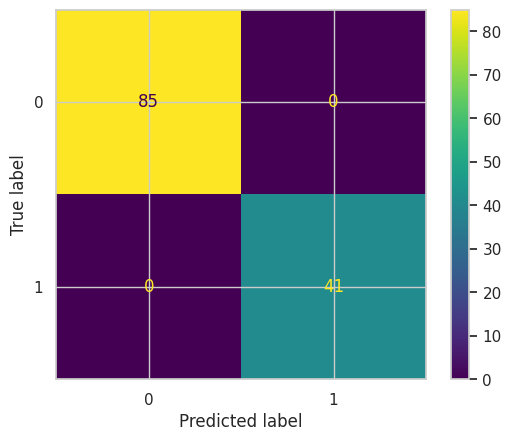

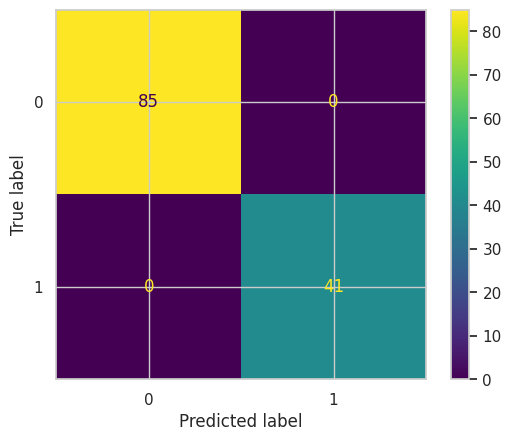

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

for i in model_lst:
    print(i)
    i.fit(x_train, y_train)
    print('-' * 100)
    y_pred = i.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix using ConfusionMatrixDisplay
    labels = ['0', '1']
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()

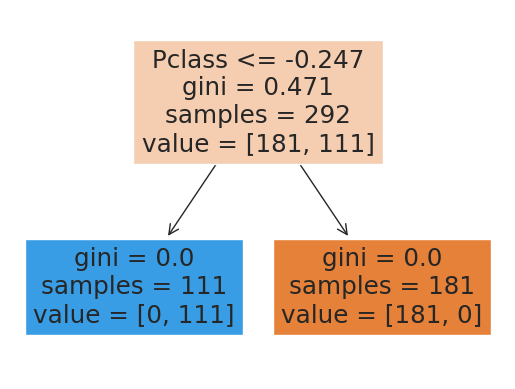

In [132]:
from sklearn.tree import plot_tree
plot_tree(i, filled=True, feature_names=list(df.columns))
plt.show()